<a href="https://colab.research.google.com/github/shahanasv/ML-PROJECT-/blob/main/SENTIMENTAL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings

In [7]:
df = pd.read_csv('IMDB Dataset.csv');
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.shape

(50000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Distribution of Positive / Negative Emotions')

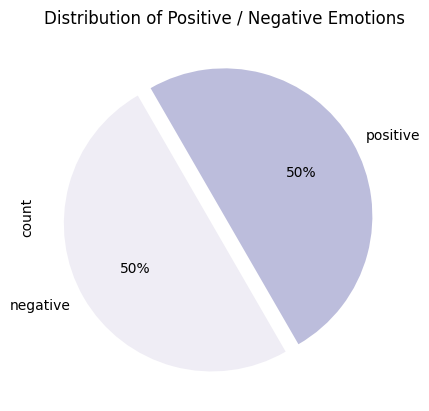

In [10]:
df['sentiment'].value_counts().plot.pie(explode=[0,0.1], autopct='%2.0f%%', startangle=300, colors = ["#bcbddc", "#efedf5"])
plt.title("Distribution of Positive / Negative Emotions")

In [11]:
for i in range(3):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [12]:
df.groupby(['sentiment'])[['sentiment']].count()

,sentiment
sentiment,
negative,25000
positive,25000


In [13]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [14]:
df['word_count'] = df['review'].apply(no_of_words)

In [15]:
df.head(10)

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
5,"Probably my all-time favorite movie, a story o...",positive,119
6,I sure would like to see a resurrection of a u...,positive,150
7,"This show was an amazing, fresh & innovative i...",negative,174
8,Encouraged by the positive comments about this...,negative,130
9,If you like original gut wrenching laughter yo...,positive,33


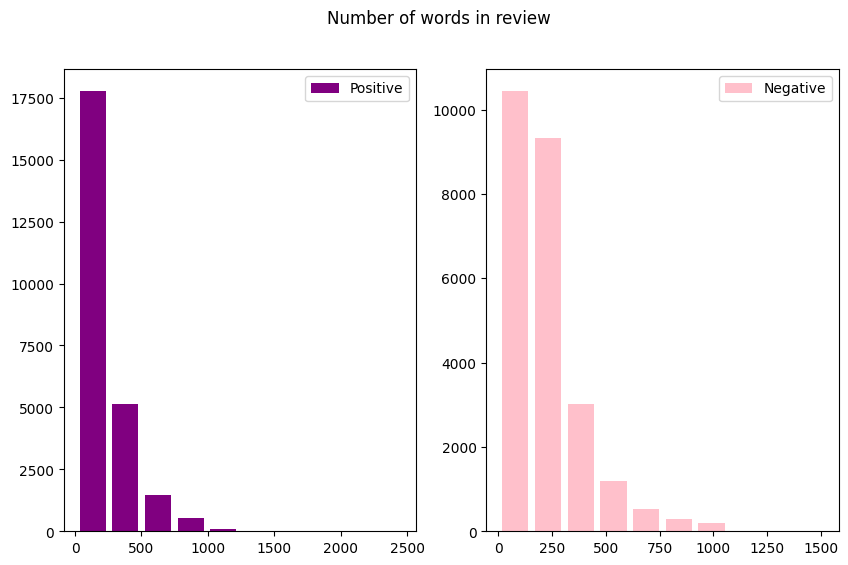

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word_count'], label='Positive', color='purple', rwidth=0.8);
ax[1].hist(df[df['sentiment'] == 'negative']['word_count'], label='Negative', color='pink', rwidth=0.8);

ax[0].legend(loc='upper right');
ax[1].legend(loc='upper right');

fig.suptitle("Number of words in review")
plt.show()


In [20]:
df.sentiment.replace("positive",1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [21]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [31]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
stop_words = set(stopwords.words('english'))

def process(review):
    review = BeautifulSoup(review).get_text()
    review = review.lower()
    review = re.sub("[^a-zA-Z]",' ',review)
    review = re.sub(r"https\S+|www\S+|http\S+", '', review, flags = re.MULTILINE)
    review = re.sub(r'\@w+|\#', '', review)
    review = re.sub(r'[^\w\s]', '', review)
    review_tokens = word_tokenize(review)
    filtered_review = [w for w in review_tokens if not w in stop_words]
    return " ".join(filtered_review)

In [33]:
df.review = df['review'].apply(process)

<ipython-input-32-609b04da9e10>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = BeautifulSoup(review).get_text()


In [34]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [35]:
df = df.drop_duplicates('review')

In [36]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return ''.join(text)

In [37]:
df.review = df['review'].apply(lambda x: stemming(x))

In [38]:
print(df.review)

0        one reviewers mentioned watching oz episode ho...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49575, dtype: object


In [39]:
df['new_word_count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word_count,new_word_count
0,one reviewers mentioned watching oz episode ho...,1,307,162
1,wonderful little production filming technique ...,1,162,86
2,thought wonderful way spend time hot summer we...,1,166,84
3,basically family little boy jake thinks zombie...,0,138,64
4,petter mattei love time money visually stunnin...,1,230,125


In [40]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word_count,new_word_count
0,one reviewers mentioned watching oz episode ho...,1,307,162
1,wonderful little production filming technique ...,1,162,86
2,thought wonderful way spend time hot summer we...,1,166,84
4,petter mattei love time money visually stunnin...,1,230,125
5,probably time favorite movie story selflessnes...,1,119,54


In [41]:
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word_count,new_word_count
3,basically family little boy jake thinks zombie...,0,138,64
7,show amazing fresh innovative idea first aired...,0,174,78
8,encouraged positive comments film looking forw...,0,130,62
10,phil alien one quirky films humour based aroun...,0,96,50
11,saw movie came recall scariest scene big bird ...,0,180,82


In [42]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 41952),
 ('movie', 37645),
 ('one', 27201),
 ('like', 17645),
 ('good', 14956),
 ('story', 12895),
 ('great', 12882),
 ('time', 12694),
 ('well', 12675),
 ('see', 12219),
 ('also', 10759),
 ('really', 10700),
 ('would', 10546),
 ('even', 9566),
 ('first', 9183)]

In [43]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,41952
1,movie,37645
2,one,27201
3,like,17645
4,good,14956


In [44]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [45]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 49581),
 ('film', 37165),
 ('one', 25980),
 ('like', 22183),
 ('even', 15081),
 ('good', 14567),
 ('bad', 14547),
 ('would', 13851),
 ('really', 12216),
 ('time', 12200),
 ('see', 10593),
 ('story', 10065),
 ('get', 10014),
 ('much', 9972),
 ('people', 9334)]

In [46]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,49581
1,film,37165
2,one,25980
3,like,22183
4,even,15081


In [47]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [48]:
X = df['review']
Y = df['sentiment']

In [49]:
X

0        one reviewers mentioned watching oz episode ho...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49575, dtype: object

In [50]:
Y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49575, dtype: int64

In [51]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [53]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34702, 101201)
Size of y_train:  (34702,)
Size of x_test:  (14873, 101201)
Size of y_test:  (14873,)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.48%


In [55]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6515  904]
 [ 661 6793]]


              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7419
           1       0.88      0.91      0.90      7454

    accuracy                           0.89     14873
   macro avg       0.90      0.89      0.89     14873
weighted avg       0.90      0.89      0.89     14873



In [56]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.52%


In [57]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6471  948]
 [1057 6397]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7419
           1       0.87      0.86      0.86      7454

    accuracy                           0.87     14873
   macro avg       0.87      0.87      0.87     14873
weighted avg       0.87      0.87      0.87     14873



In [58]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.42%


In [59]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6570  849]
 [ 724 6730]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7419
           1       0.89      0.90      0.90      7454

    accuracy                           0.89     14873
   macro avg       0.89      0.89      0.89     14873
weighted avg       0.89      0.89      0.89     14873



In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
grid = GridSearchCV(logreg, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ..................solver=newton-cg;, score=0.894 total time=   4.1s
[CV 2/5] END ..................solver=newton-cg;, score=0.892 total time=   2.7s
[CV 3/5] END ..................solver=newton-cg;, score=0.893 total time=   2.9s
[CV 4/5] END ..................solver=newton-cg;, score=0.888 total time=   2.6s
[CV 5/5] END ..................solver=newton-cg;, score=0.890 total time=   4.1s
[CV 1/5] END ......................solver=lbfgs;, score=0.894 total time=   5.3s
[CV 2/5] END ......................solver=lbfgs;, score=0.892 total time=   2.9s
[CV 3/5] END ......................solver=lbfgs;, score=0.893 total time=   6.2s
[CV 4/5] END ......................solver=lbfgs;, score=0.888 total time=   6.4s
[CV 5/5] END ......................solver=lbfgs;, score=0.890 total time=   4.9s
[CV 1/5] END ..................solver=liblinear;, score=0.894 total time=   2.0s
[CV 2/5] END ..................solver=liblinear;

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



[CV 1/5] END ......................penalty=none;, score=0.877 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



[CV 2/5] END ......................penalty=none;, score=0.885 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



[CV 3/5] END ......................penalty=none;, score=0.874 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



[CV 4/5] END ......................penalty=none;, score=0.865 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



[CV 5/5] END ......................penalty=none;, score=0.873 total time=   4.9s
[CV 1/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ........................penalty=l2;, score=0.894 total time=   5.4s
[CV 2/5] END ...............

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 1/5] END ..............................C=10;, score=0.893 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 2/5] END ..............................C=10;, score=0.895 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 3/5] END ..............................C=10;, score=0.894 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 4/5] END ..............................C=10;, score=0.890 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 5/5] END ..............................C=10;, score=0.890 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 1/5] END .............................C=100;, score=0.884 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 2/5] END .............................C=100;, score=0.888 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 3/5] END .............................C=100;, score=0.884 total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 4/5] END .............................C=100;, score=0.882 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


10 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File 

[CV 5/5] END .............................C=100;, score=0.884 total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             verbose=3)

In [61]:
print("best cross validation score: {:.4f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.8921
best parameters:  {'C': 10}


In [92]:
logreg = LogisticRegression(C =10)
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.73%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [93]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6570  849]
 [ 724 6730]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7419
           1       0.89      0.90      0.90      7454

    accuracy                           0.89     14873
   macro avg       0.89      0.89      0.89     14873
weighted avg       0.89      0.89      0.89     14873

